In [5]:
from google.colab import files
files.upload()

Saving house-votes-84.csv to house-votes-84.csv


{'house-votes-84.csv': b'republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y\nrepublican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?\ndemocrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n\ndemocrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y\ndemocrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y\ndemocrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y\ndemocrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y\nrepublican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y\nrepublican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y\ndemocrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?\nrepublican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n\nrepublican,n,y,n,y,y,y,n,n,n,n,y,?,y,y,?,?\ndemocrat,n,y,y,n,n,n,y,y,y,n,n,n,y,n,?,?\ndemocrat,y,y,y,n,n,y,y,y,?,y,y,?,n,n,y,?\nrepublican,n,y,n,y,y,y,n,n,n,n,n,y,?,?,n,?\nrepublican,n,y,n,y,y,y,n,n,n,y,n,y,y,?,n,?\ndemocrat,y,n,y,n,n,y,n,y,?,y,y,y,?,n,n,y\ndemocrat,y,?,y,n,n,n,y,y,y,n,n,n,y,n,y,y\nrepublican,n,y,n,y,y,y,n,n,n,n,n,?,y,y,n,n\ndemocrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y\ndemocrat,y,y,y,n,n,?,y,y,n,n,y,n,n,n,y,y\ndemocrat,y,y,y,n,n,n,y,y,y,n,n,n,?,?,y,y\ndemocrat,y,?,y,n,n,n,y,y,y,n,n,?,

## Adquisición y Adecuación de base de datos House-votes-84

# K vecinos más cercanos

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Importación de datos a collab***

In [14]:
import pandas as pd
nRowsRead = None
COLUMNS2 = ['Clasee Name','handicapped-infants', 'water-project-cost-sharing',
            'adoption-of-the-budget-resolution', 'education_num',
            'marital','physician-fee-freeze','el-salvador-aid','religious-groups-in-schools',
            'anti-satellite-test-ban', 'aid-to-nicaraguan-contras','mx-missile',
            'inmigration','synfuels-coporation-cutback','education-spending',
            'superfund-rigth-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
df2 = pd.read_csv('house-votes-84.csv', delimiter=',',nrows= nRowsRead, names=COLUMNS2)

nRow, nCol = df2.shape
print(f'Hay {nRow} filas y {nCol} columnas')


Hay 435 filas y 19 columnas


##Mostrar una visualización de la tabla con datos importados:

En dicha tabla se puede observar los votos de los republicanos y democratas en ciertos temas de interes por los que estaban teniendo el consenso.

la y, seria voto a favor, n en contra y los ? votos se podria llamar no participativos o en blanco.

En dicha tabla se evidencian dos columnas finales que no contienen información los cuales considero que podrian ser retiradas.

Y los resultados podrian pasarse a numericos ?=0, n=1 & y=2. para poder sacar media, mediana etc


In [15]:
df2.head()

,Clasee Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,education_num,marital,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,inmigration,synfuels-coporation-cutback,education-spending,superfund-rigth-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,NaN,NaN
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,NaN,NaN
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,NaN,NaN
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,NaN,NaN
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,NaN,NaN



#Se revisa información sobre la estructura en la data


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Clasee Name                             435 non-null    object 
 1   handicapped-infants                     435 non-null    object 
 2   water-project-cost-sharing              435 non-null    object 
 3   adoption-of-the-budget-resolution       435 non-null    object 
 4   education_num                           435 non-null    object 
 5   marital                                 435 non-null    object 
 6   physician-fee-freeze                    435 non-null    object 
 7   el-salvador-aid                         435 non-null    object 
 8   religious-groups-in-schools             435 non-null    object 
 9   anti-satellite-test-ban                 435 non-null    object 
 10  aid-to-nicaraguan-contras               435 non-null    object

# Eliminar columnas que en este caso se ve que no contienen información


Otra forma de tratar las columnas con valores nulos segun requerimientos sin eliminar la columna, puede ser poner un 0 o colocar la media

Para llenar la columna sin datos con el valor de 0 se usa:



```
 df2=['columna'] = df2['columna'].fillna(0)
```



In [17]:
df2 =  df2.drop(columns=['duty-free-exports'])
df2 =  df2.drop(columns=['export-administration-act-south-africa'])

# Convertir el tipo de dato  object a datos numericos para poder tratarlos 

In [18]:
df2['water-project-cost-sharing'].unique()

array(['y', 'n', '?'], dtype=object)

In [19]:
cambio_df2={"handicapped-infants":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"water-project-cost-sharing":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"adoption-of-the-budget-resolution":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"education_num":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"marital":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"physician-fee-freeze":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"el-salvador-aid":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"religious-groups-in-schools":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"anti-satellite-test-ban":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"aid-to-nicaraguan-contras":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"anti-satellite-test-ban":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"mx-missile":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"inmigration":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"synfuels-coporation-cutback":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"education-spending":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"superfund-rigth-to-sue":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
cambio_df2={"crime":{'?':0, 'n':1, 'y':2}}
df2.replace(cambio_df2, inplace=True)
df2


,Clasee Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,education_num,marital,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,inmigration,synfuels-coporation-cutback,education-spending,superfund-rigth-to-sue,crime
0,republican,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,republican,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
2,democrat,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,democrat,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,democrat,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,1,1,2,2,2,2,1,1,2,2,1,2,2,2,1,2
431,democrat,1,1,2,1,1,1,2,2,2,2,1,1,1,1,1,2
432,republican,1,0,1,2,2,2,1,1,1,1,2,2,2,2,1,2
433,republican,1,1,1,2,2,2,0,0,0,0,1,2,2,2,1,2


pasar los campos a numerico con
df2['coluimna'] = pd.to_numeric(daf2['columna'], errors='coerce')

# Cuantos votos por partido se dieron, se establece nuestra variable dependiente y, la columna "Clasee Name" 

In [23]:
#Variable dependiente
y= df2['Clasee Name']
y
#Variables independientes
X= df2.drop('Clasee Name', axis=1)


# Conjunto de entrenamiento y pruebas

In [24]:
from sklearn.model_selection import train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X,y, test_size=0.3, random_state=40)
#Al ver lo generado en X_entrenamiento podemos ver que las filas son aleatorias
X_entrenamiento

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,education_num,marital,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,inmigration,synfuels-coporation-cutback,education-spending,superfund-rigth-to-sue,crime
359,1,1,1,2,2,2,1,1,1,2,0,2,2,2,1,2
267,2,1,1,1,1,1,2,2,2,2,1,1,1,2,1,2
368,1,2,2,1,1,2,2,2,1,2,1,1,1,1,2,2
431,1,1,2,1,1,1,2,2,2,2,1,1,1,1,1,2
217,1,2,1,2,2,2,1,1,1,2,1,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,1,1,2,2,2,1,1,1,1,1,2,2,2,1,1
165,1,2,2,1,1,2,2,2,2,2,2,1,2,1,2,0
7,1,2,1,2,2,2,1,1,1,1,1,1,2,2,0,2
219,1,2,2,1,1,1,1,2,2,1,2,1,1,2,2,2


# Entrenamiento y predicciones

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)

In [26]:
#con el valor de K indicado, se procede a entrarn el modelo
knn.fit(X_entrenamiento, y_entrenamiento)

KNeighborsClassifier(n_neighbors=1)

Continuamos con las predicciones

In [28]:
prediccion = knn.predict(X_prueba)
prediccion

array(['democrat', 'democrat', 'democrat', 'democrat', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'democrat', 'republican', 'republican', 'democrat', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'republican', 'republican', 'republican', 'democrat', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'republican', 'republican', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'republican', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'republican', 'republican', 'democrat', 'democrat',
       'republican', 'democrat', 'democrat', 'republican', 'republican',
       'republican', 'republican', 'republican', 'democrat', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'democr

# Metodo de evaluación
Validar que tan correcta es la evaluación

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

#Se crea una matriz de confusión en base a los datos de prueba y las predicciones
print(confusion_matrix(y_prueba, prediccion))

[[77  8]
 [ 7 39]]


In [30]:
#Presición
print(classification_report(y_prueba, prediccion))

              precision    recall  f1-score   support

    democrat       0.92      0.91      0.91        85
  republican       0.83      0.85      0.84        46

    accuracy                           0.89       131
   macro avg       0.87      0.88      0.87       131
weighted avg       0.89      0.89      0.89       131



# Evaluar cual seria el K mas óptimo

In [31]:
tasaError = [] #La tasa de error mas baja será la K apropiada
for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_entrenamiento, y_entrenamiento)
  prediccion_bucle = knn.predict(X_prueba)
  #tasa de error sera la media de los valores diferentes entre predicción y el y_prueba
  tasaError.append(np.mean(prediccion_bucle != y_prueba)) 

In [32]:
tasaError

[0.11450381679389313,
 0.09923664122137404,
 0.12213740458015267,
 0.10687022900763359,
 0.11450381679389313,
 0.11450381679389313,
 0.11450381679389313,
 0.11450381679389313,
 0.10687022900763359,
 0.11450381679389313,
 0.10687022900763359,
 0.11450381679389313,
 0.10687022900763359,
 0.12213740458015267,
 0.12213740458015267,
 0.12213740458015267,
 0.12213740458015267,
 0.1297709923664122,
 0.1297709923664122,
 0.1297709923664122,
 0.1297709923664122,
 0.1297709923664122,
 0.13740458015267176,
 0.1297709923664122,
 0.13740458015267176,
 0.13740458015267176,
 0.13740458015267176,
 0.1297709923664122,
 0.1297709923664122]

Ver a nivel gráfico cual K es mejor

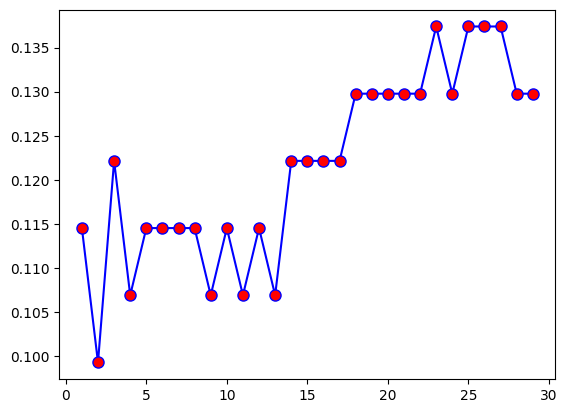

In [33]:
kOptimo = range(1,30)
plt.plot(kOptimo, tasaError, color = 'blue', marker='o', markerfacecolor='red', markersize=8)
#el Valor de K mas adecuado para entrenar el modelo es de 2

# Entrenamiento con el valor de K, encontrado

In [34]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_entrenamiento, y_entrenamiento)
prediccion= knn.predict(X_prueba)
#Presición
print(classification_report(y_prueba, prediccion))

              precision    recall  f1-score   support

    democrat       0.91      0.94      0.92        85
  republican       0.88      0.83      0.85        46

    accuracy                           0.90       131
   macro avg       0.90      0.88      0.89       131
weighted avg       0.90      0.90      0.90       131



In [35]:
print(confusion_matrix(y_prueba, prediccion))

[[80  5]
 [ 8 38]]
